In [1]:
import numpy as np
from random import random, uniform, randint
from matplotlib import pyplot as plt
import pandas as pd


from calc import distance, intersection, parallel, angle, orthogonal
from draw import draw
from line import Line
from plane import Plane
from point import Point
from solver import solve
from vector import Vector

__all__ = (
    "Line",
    "Plane",
    "Point",
    "Vector",
    "angle",
    "distance",
    "draw",
    "intersection",
    "orthogonal",
    "parallel",
    "solve",
)

In [15]:
yy

Point(0.22018348623853212, -0.5871559633027523, 0.44036697247706424)

In [70]:

def get_rotation_matrix_from_plane_to_oxy(A, B, C):
    plane1 = Plane(A, B, C) #плоскость многогранника
    plane2 = Plane(Point(0, 0, 0), Vector(0, 0, 1)) #плоскость Oxy
    #перенесем плоскость plane1 в начало координат
    plane3 = Plane(Point(0, 0, 0), plane1.n)
    #перенесем точки в plane3
    yy = intersection(plane1, Line(Point(0, 0, 0), plane1.n))
    #это координаты параллельного переноса
    x_, y_, z_ = yy[0], yy[1], yy[2]
    A[0] -= x_
    A[1] -= y_
    A[2] -= z_
    B[0] -= x_
    B[1] -= y_
    B[2] -= z_
    C[0] -= x_
    C[1] -= y_
    C[2] -= z_

    assert A in plane3
    assert B in plane3
    assert C in plane3

    v = plane1.intersection(plane2)
    v = v.dv #direction vector
    v = v.normalized()
    x, y, z = v[0], v[1], v[2]
    assert z==0

    #угол между векторами нормали к плоскостям
    th = np.pi*2 - plane1.n.angle(plane2.n)

    #по x, y, z получим матрицу поворота по формуле (*)
    M = np.array([[np.cos(th) + (1-np.cos(th))*x*x, (1-np.cos(th))*x*y - np.sin(th)*z, (1-np.cos(th))*x*z + np.sin(th)*y],
                  [(1-np.cos(th))*y*x + np.sin(th)*z, np.cos(th) + (1-np.cos(th))*y*y, (1-np.cos(th))*y*z-np.sin(th)*x],
                  [(1-np.cos(th))*z*x - np.sin(th)*y, (1-np.cos(th))*z*y + np.sin(th)*x, np.cos(th) + (1-np.cos(th))*z*z]])
    
    if abs((M@np.array([A[0], A[1], A[2]]))[2]) > 0.0000001:
        print("here we are")
        th = plane1.n.angle(plane2.n)
        M = np.array([[np.cos(th) + (1-np.cos(th))*x*x, (1-np.cos(th))*x*y - np.sin(th)*z, (1-np.cos(th))*x*z + np.sin(th)*y],
                  [(1-np.cos(th))*y*x + np.sin(th)*z, np.cos(th) + (1-np.cos(th))*y*y, (1-np.cos(th))*y*z-np.sin(th)*x],
                  [(1-np.cos(th))*z*x - np.sin(th)*y, (1-np.cos(th))*z*y + np.sin(th)*x, np.cos(th) + (1-np.cos(th))*z*z]])
        
    return M

In [130]:
def rotate_figure(figure):
    #проверка на то что это хотя бы треугольник
    if len(figure) < 3:
        print("Not enought points")
        return figure
    #проверка на то что в одной плоскости лежат все точки
    plane1 = Plane(figure[0], figure[1], figure[2])
    for point in figure:
        if not(point in plane1):
            print("Point not in plane")
            return figure
    #все ок значик
    M = get_rotation_matrix_from_plane_to_oxy(figure[0], figure[1], figure[2])
    
    figure_ = []
    for point in figure:
        point_ = M@np.array([point[0], point[1], point[2]])
        if point_[2] > 0.0000001:
            print("here we are, very strange")
            return figure
        figure_.append(Point(point_[0], point[1], 0))
    return figure_

def from_list_points_to_plot(figure, color=None):
    if color is None:
        color = (random(), random(), random(), random())
    for i in range(len(figure)-1):
        x = [figure[i][0], figure[i+1][0]]
        y = [figure[i][1], figure[i+1][1]]
        plt.plot(x, y, color=color)
    x = [figure[-1][0], figure[0][0]]
    y = [figure[-1][1], figure[0][1]]
    plt.plot(x, y, color=color)

In [157]:
A = Point(-50, 5, 0)
B = Point(188, 20, 200)
C = Point(30, -200, 100)

def S_from_triangle(triangle):
    # по точкам треугольника получить площадь
    x1 = triangle[0][0]
    y1 = triangle[0][1]
    x2 = triangle[1][0]
    y2 = triangle[1][1]    
    x3 = triangle[2][0]
    y3 = triangle[2][1]
    return 0.5*abs((x2 - x1)*(y3 - y1) - (x3 - x1)*(y2 - y1))

print(S_from_triangle(np.array([A, B, C])))
print(S_from_triangle(rotate_figure(np.array([A, B, C]))))

24995.0
31147.159098085598


In [138]:
S_from_triangle(rotate_figure(np.array([A, B, C])))

here we are


4.687511501684673

In [139]:
rotate_figure(np.array([A, B, C]))

here we are


[Point(-3.291883388842985, 3.8876404494382024, 0.0),
 Point(1.1247679422441186, -0.1123595505617978, 0.0),
 Point(-1.218987808598218, -0.1123595505617978, 0.0)]

here we are


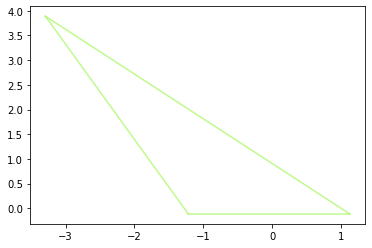

In [136]:
A = Point(1, 2, -10)
B = Point(1, -2, -2)
C = Point(-3, -2, 1)

from_list_points_to_plot(rotate_figure(np.array([A, B, C])))

In [89]:
rotate_figure(np.array([A, B, C]))

[Point(8.742640687119284, -4.5, 0.0),
 Point(4.32842712474619, -1.5, 0.0),
 Point(-9.035533905932736, 5.5, 0.0)]

In [81]:
A = Point(1, 2, -6)
B = Point(1, -2, -4)
C = Point(-6, 5, 5)

M = get_rotation_matrix_from_plane_to_oxy(A, B, C)

In [82]:
np.array([A, B, C])

array([Point(4.5, -4.5, -6.0), Point(1.5, -1.5, -4.0),
       Point(-5.5, 5.5, 5.0)], dtype=object)

In [83]:
M@np.array([A[0], A[1], A[2]])

array([ 8.74264069e+00, -2.57359313e-01,  1.10218212e-15])

In [84]:
M@np.array([B[0], B[1], B[2]])

array([4.32842712e+00, 1.32842712e+00, 7.34788079e-16])

In [85]:
M@np.array([C[0], C[1], C[2]])

array([-9.03553391e+00,  1.96446609e+00, -9.18485099e-16])

In [18]:
plane1

Plane(Point(3.779816513761468, 5.587155963302752, 5.559633027522936), Vector(3, -8, 6))

In [19]:
plane3

Plane(Point(0, 0, 0), Vector(3, -8, 6))

In [21]:
A in plane3

True

In [13]:
plane1.intersection(plane3)

ValueError: Expected 2 values, got 1

In [6]:
A in plane3

True

In [74]:
M@(np.array([A[0], A[1], A[2]]))

array([ 5.96040144, -0.22773718,  6.39019518])

In [50]:
plane1.n

Vector(3, -8, 6)

In [49]:
v

Vector(0.9363291775690445, 0.35112344158839165, 0.0)

In [43]:
A in plane1

True

In [48]:
B

Point(0, 2, 4)

In [47]:
M@np.array([B[0], B[1], B[2]])

array([ 1.42904364, -1.81078303,  3.83130514])

In [20]:
v.dv.normalized()

Vector(0.9363291775690445, 0.35112344158839165, 0.0)

In [23]:
plane1

Plane(Point(4, 5, 6), Vector(3, -8, 6))

In [24]:
plane2

Plane(Point(0, 0, 0), Vector(0, 0, 1))

In [25]:
plane1.n

Vector(3, -8, 6)